# S2
This is a iPython Notebook document, associated to the S2 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

commun/scene.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x[dtoi(p, N, Dmin, Dmax)] = I


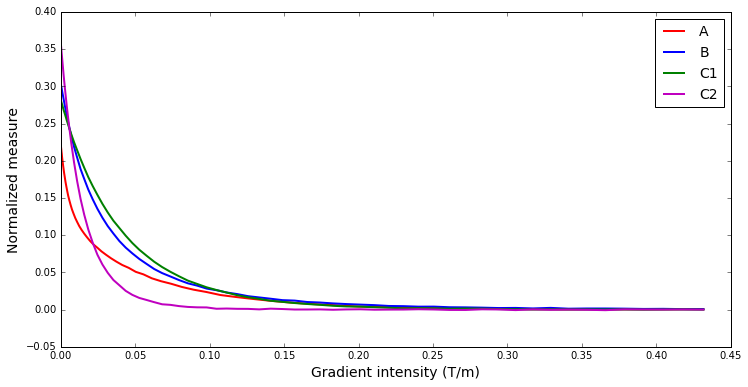

In [1]:
#############################
#Import bib
##############################
import numpy as np
import scipy
from scipy.special import lambertw
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import time
import Code.scene as scene 
import Code.PALMA as PALMA
##############################
#Measurement parameter
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D= 16
noise = 0.001 #noise = 0.1%
##############################
#Measurement of Signal A
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
tA = scene.t_exp(D, Delta, invshift=10)
tA = tA.reshape((M,1))
KA = np.exp(-np.kron(tA,Lap_axis.T))
xA = scene.scene_Kazi(N, Dmin, Dmax)
xA = xA.reshape((N,1))
zA = np.dot(KA,xA) 
sigmaA = noise*zA[0]
yA = zA + sigmaA*np.random.randn(M,1)
##############################
#Measurement of Signal B
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
tB = scene.t_linear(D, Delta)
tB = tB.reshape((M,1))
KB = np.exp(-np.kron(tB,Lap_axis.T))
xB = scene.scene_Gauss(N)
xB = xB.reshape((N,1))
zB = np.dot(KB,xB) 
sigmaB = noise*zB[0]
yB = zB + sigmaB*np.random.randn(M,1)
##############################
#Measurement of Signal C1
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
tC = scene.t_linear(D, Delta)
tC = tC.reshape((M,1))
KC = np.exp(-np.kron(tC,Lap_axis.T))
#C1
xC1 = scene.scene_Xu(N, Dmin, Dmax, width=4)
xC1 = xC1.reshape((N,1))
zC1 = np.dot(KC,xC1) 
sigmaC1 = noise*zC1[0]
yC1 = zC1 + sigmaC1*np.random.randn(M,1)
##############################
#Measurement of Signal C2
##############################
xC2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
xC2 = xC2.reshape((N,1))
zC2 = np.dot(KC,xC2) 
sigmaC2 = noise*zC2[0]
yC2 = zC2 + sigmaC2*np.random.randn(M,1)
# Graphic
plt.figure(figsize=(12,6))
plt.plot(tA, yA/np.linalg.norm(yA), 'r', linewidth= 2, label='A')
plt.plot(tB, yB/np.linalg.norm(yB), 'b', linewidth= 2, label='B')
plt.plot(tC, yC1/np.linalg.norm(yC1), 'g', linewidth= 2, label='C1')
plt.plot(tC, yC2/np.linalg.norm(yC2), 'm', linewidth= 2, label='C2')
plt.legend()
plt.xlabel('Gradient intensity (T/m)', fontsize=14)
plt.ylabel('Normalized measure', fontsize=14)
plt.legend(loc=1, fontsize=14)
plt.show()
#plt.savefig('S2.eps', format='eps', dpi=1000)